In [ ]:
#In this file we will compare the difference between SinGAN random sampled image with the traditional image
#The traditional image is stored in "cifar10-2classes-trainset"
#The Singan generated image is stored in "singan-generated"


In [2]:
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
import numpy as np

[[[ 45  20  19]
  [ 42  21  18]
  [ 35  17  13]
  ...
  [ 93  86  81]
  [ 51  47  42]
  [ 39  36  32]]

 [[ 46  22  20]
  [ 42  22  18]
  [ 40  22  18]
  ...
  [105  93  92]
  [ 66  53  52]
  [ 48  39  36]]

 [[ 43  22  19]
  [ 40  21  17]
  [ 48  32  27]
  ...
  [ 88  74  77]
  [ 77  59  60]
  [ 58  44  43]]

 ...

 [[ 55  54  51]
  [ 67  57  54]
  [ 73  64  57]
  ...
  [ 93  87  49]
  [101 116  34]
  [103 123  30]]

 [[ 55  54  51]
  [ 62  53  50]
  [ 68  59  52]
  ...
  [ 69  62  38]
  [ 81  93  29]
  [ 99 117  35]]

 [[ 58  53  51]
  [ 59  46  44]
  [ 58  45  40]
  ...
  [ 77  68  53]
  [ 66  75  29]
  [ 83  99  31]]]
<class 'PIL.Image.Image'>
RGB
(32, 32)


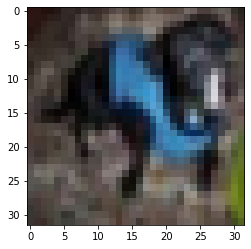

In [3]:
# compare only 1 image

# load the image
ori_image = Image.open('./cifar10-2classes-trainset/dog/0.png')
# convert image to numpy array
ori_data = asarray(ori_image)
print(ori_data)
# summarize shape
#print(data.shape)

# create Pillow image
image2 = Image.fromarray(ori_data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

pyplot.imshow(ori_image)
pyplot.show()


[[[ 28   9  14]
  [ 34  13   7]
  [ 37  18  13]
  ...
  [ 82  85  79]
  [ 45  44  42]
  [ 35  35  29]]

 [[ 35  13   7]
  [ 40  12   6]
  [ 43  19  13]
  ...
  [ 96  94  95]
  [ 62  53  52]
  [ 45  38  35]]

 [[ 36  14  12]
  [ 37  12   9]
  [ 41  25  21]
  ...
  [ 81  73  87]
  [ 67  55  63]
  [ 47  39  45]]

 ...

 [[ 61  49  54]
  [ 61  53  56]
  [ 69  66  65]
  ...
  [ 83  82  31]
  [ 83 100  20]
  [ 91 115  33]]

 [[ 67  57  58]
  [ 62  51  46]
  [ 61  57  45]
  ...
  [ 70  70  32]
  [ 78  90  26]
  [ 92 106  35]]

 [[ 59  53  50]
  [ 57  47  39]
  [ 55  48  35]
  ...
  [ 69  68  40]
  [ 71  78  25]
  [ 80  86  18]]]
(32, 32, 3)
<class 'PIL.Image.Image'>
RGB
(32, 32)


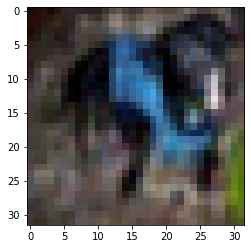

In [67]:
comp_image = Image.open('./singan-generated/dog/dog0_19.png')
# convert image to numpy array
comp_data = asarray(comp_image)
comp_data = comp_data[:,:,:3]
print(comp_data)
# summarize shape
print(comp_data.shape)

# create Pillow image
image2 = Image.fromarray(comp_data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

pyplot.imshow(comp_image)
pyplot.show()

[[ 44.75     44.6875   90.4375 ]
 [ 52.46875 104.6875   97.84375]
 [112.5625  149.28125  96.34375]
 [111.65625 134.34375 120.5625 ]
 [135.      126.28125  95.625  ]
 [ 88.71875 104.40625 134.84375]
 [141.375   126.59375 142.625  ]
 [143.3125  104.6875  143.0625 ]
 [119.46875  89.40625  83.0625 ]
 [110.625    80.625   118.46875]
 [ 83.09375  97.125   112.0625 ]
 [ 83.875   113.65625 134.5625 ]
 [ 90.84375 106.3125  105.78125]
 [113.5      93.78125 114.78125]
 [106.40625  70.84375 130.71875]
 [ 75.375    68.15625 121.78125]
 [ 98.4375  106.6875  137.375  ]
 [ 92.09375  68.3125   83.3125 ]
 [106.1875   90.09375 135.71875]
 [108.53125  70.40625  79.125  ]
 [105.9375   93.3125   42.71875]
 [ 90.96875 113.625    97.34375]
 [106.71875  82.6875   91.59375]
 [113.09375  74.65625  90.28125]
 [ 82.71875  67.1875   90.9375 ]
 [ 76.1875   46.0625   92.6875 ]
 [113.875    75.375    81.09375]
 [104.5625   89.3125  111.5    ]
 [112.46875 112.6875   30.03125]
 [ 76.       98.4375   69.03125]
 [ 38.1875

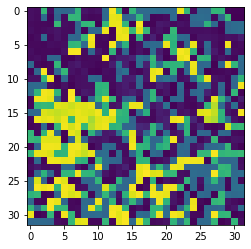

In [72]:
print(np.mean(np.abs(ori_data - comp_data), axis = 0))
pyplot.imshow(np.mean(np.abs(ori_data - comp_data), axis = 2))

In [74]:
#check ssim of original image and data augment image for CIFAR-10
from skimage.measure import compare_ssim
import cv2

# Load the two input images
imageA = cv2.imread('./singan-generated/dog/dog0_19.png')
imageB = cv2.imread('./cifar10-2classes-trainset/dog/0.png')

#Convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

#Compute the Structural Similarity Index (SSIM) between the two
#    images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")

#You can print only the score if you want
print("SSIM: {}".format(score))

SSIM: 0.9502825966872609


In [77]:
#check ssim of original image and flop image
from skimage.measure import compare_ssim
import cv2

# Load the two input images
imageA = cv2.imread('./cifar10-2classes-mirror/dog/flop-0.png')
imageB = cv2.imread('./cifar10-2classes-trainset/dog/0.png')

#Convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

#Compute the Structural Similarity Index (SSIM) between the two
#    images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")

#You can print only the score if you want
print("SSIM: {}".format(score))


SSIM: 0.21701601819292465


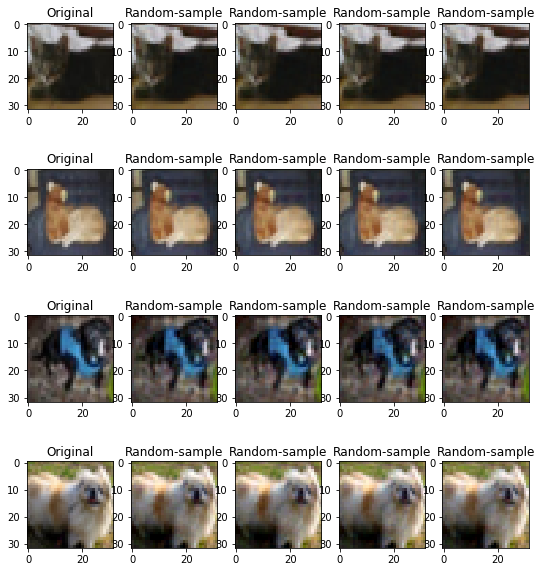

In [12]:
#plot the image out

fig = pyplot.figure(figsize=(9, 13))
ax = []
n = 0
#pyplot.title('Comparision between original image and SinGAN random sample images')
class_list = ['cat', 'dog']
for cla in class_list:
    for i in range(2): 
        ori_image = Image.open('./cifar10-2classes-trainset/{}/{}.png'.format(cla,i))
        ax.append(fig.add_subplot(5, 5, n+1))
        ax[-1].set_title("Original")  # set title
        pyplot.imshow(ori_image)
        n += 1
        for j in range(4):
            comp_image = Image.open('./singan-generated/{}/{}{}_{}.png'.format(cla,cla,i, j))
            ax.append(fig.add_subplot(5, 5, n+1))
            ax[-1].set_title("Random-sample")  # set title
            pyplot.imshow(comp_image)
            n += 1


pyplot.savefig('comparision.png')
pyplot.show()



        
        
    


(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)


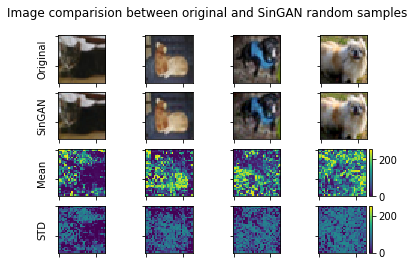

In [39]:

fig, ax = pyplot.subplots(4, 4,)
fig.suptitle('Image comparision between original and SinGAN random samples')
n = 0

#pyplot.title('Comparision between original image and SinGAN random sample images')
class_list = ['cat', 'dog']
for cla in class_list:
    for i in range(2): 
        ori_image = Image.open('./cifar10-2classes-trainset/{}/{}.png'.format(cla,i))
        ori_data = asarray(ori_image)
        ori_data = np.array([ori_data])
        print(ori_data.shape)
        numpy_list = []
        for j in range(20):
            comp_image = Image.open('./singan-generated/{}/{}{}_{}.png'.format(cla,cla,i, j))
            comp_data = asarray(comp_image)
            #comp_data has alpha value. Need to remove it to match the dimension of ori_data
            comp_data = comp_data[:,:,:3]
            numpy_list.append(comp_data)
        
        singan_data = np.array(numpy_list)
        #print(singan_data.shape)
        #print(np.max(singan_data), np.min(singan_data))
        #print(np.max(ori_data), np.min(ori_data))
        rgb_weights = [0.2989, 0.5870, 0.1140]
        gray_mean = np.dot(np.mean(np.abs(ori_data - singan_data), axis = 0), rgb_weights)
        gray_std = np.dot(np.std(np.abs(ori_data - singan_data), axis = 0), rgb_weights)
        #gray = np.mean(np.abs(ori_data - comp_data), axis = 0)
        #print(np.max(gray), np.min(gray))
        ax[0, n].imshow(ori_data.astype(int)[0], vmin=0, vmax=255)
        ax[1, n].imshow(singan_data.astype(int)[0], vmin=0, vmax=255)
        a = ax[2, n].imshow(gray_mean.astype(int),vmin=0, vmax=255)
       
        c = ax[3, n].imshow(gray_std.astype(int), vmin=0, vmax = 255)
        
        n += 1


fig.colorbar(a, ax=ax[2, -1])
fig.colorbar(c, ax=ax[3, -1])
for j in range(len(ax)):
    for i in ax[j]:
        i.set_yticklabels([])
        i.set_xticklabels([])

#f3_ax2 = fig.add_subplot(ax[0, :-1])

ax[0][0].set_ylabel('Original')
ax[1][0].set_ylabel('SinGAN')
ax[2][0].set_ylabel('Mean')
ax[3][0].set_ylabel('STD')
np.mean(np.abs(ori_data - comp_data))

pyplot.savefig('mean.png')
#test on the singan data
#try train on original data and test on singan data
#original image probability and the singan data probability
#are the difference important to the model accuary high: no change accuary low: the data will hurt the model

In [43]:
np.mean(np.abs(ori_data - singan_data))
np.mean(np.abs(ori_data - singan_data))

119.15577799479166